# 画像の文字鮮明化
用途：手書き文字を画像化したときに薄くて読みにくいから文字を濃くしたい場合など  
用法：前半パート_画像毎に個別に処理  
　　　後半パート_ディレクトリ内の画像をすべて処理  
　　　に分かれています。前半パートで1枚やってみて閾値を調整して、  
　　　後半パートでディレクトリ全体に処理するのが良いかと思います。  
注意：出力はグレースケールになります。画像はJPEGを前提とします。スキャナで読み取った画像など光源の影響で明るさが変化しない画像を前提とします。明るさが変化する場合は<a href='http://labs.eecs.tottori-u.ac.jp/sd/Member/oyamada/OpenCV/html/py_tutorials/py_imgproc/py_thresholding/py_thresholding.html#id4'>適応的閾値処理</a>を参考にしてください。

In [1]:
import cv2
import os
import re
import numpy as np
import glob


### 閾値の設定
このノート全体で使用する閾値を設定します。

In [2]:
# グレースケールに変換後、カラーの背景が薄い灰色になるのでこのLEVEL以上の明るさは白にします
DROPOUT_LEVEL = 160 #背景がグレーなのでかなり低い数値ですが230くらいから試すことをお勧めします。test001では240です。
# 黒を濃くする割合
BLACK_RATE = 1.8
# 画像が入ったディレクトリ
IMAGE_DIR = 'images/ClearCharacter/'
# 前半の個別で見たい画像ファイル名
IMAGE_NAME = 'test002.jpg'
# 画像の出力先
OUTPUT_DIR = 'images/out/'

#### 関数定義
このjupyter notebookで使用する諸々の関数の定義です。なにも気にしないで実行してください。

In [3]:
# jupyter notebook 上での確認用関数
from IPython.display import display, Image

def display_cv_image(image, format='.jpg'):
    decoded_bytes = cv2.imencode(format, image)[1].tobytes()
    display(Image(data=decoded_bytes))

In [4]:
# 背景色の削除
def dropout_background_color(target_img):
    gray_img = cv2.cvtColor(target_img, cv2.COLOR_BGR2GRAY)
    mask_white = gray_img > DROPOUT_LEVEL
    gray_img[mask_white] = 255
    return gray_img

In [5]:
# 濃淡の調整
def adjust_thickness(gray_img):
    black_white = 255 - gray_img
    black_white = black_white * BLACK_RATE
    mask255 = black_white > 255
    black_white[mask255] = 255
    black_white = black_white.astype('int')
    gray_img = 255 - black_white
    return gray_img

## Part1: 個別画像での閾値調整

### 入力画像の確認

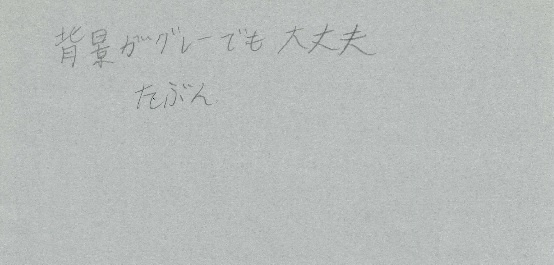

In [6]:
img = cv2.imread(IMAGE_DIR + IMAGE_NAME)
display_cv_image(img)

### グレースケール変換後の画像

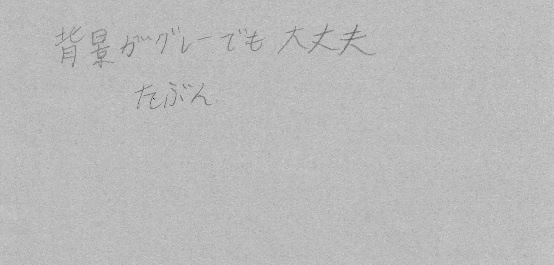

In [7]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
display_cv_image(gray_img)

### 背景色の削除(任意)
背景色が残るとそこもまた濃くなります。なので削除推奨です。
削除しないのであればDROPOUT_LEVELを255に設定してください。
DROPOUT_LEVELが良い感じになると、以下のセルを実行しすると背景色が白くなります。初めの閾値設定のセルでDROPOUT_LEVELを調整・以下のセルを実行を繰り返し、ちょうどよい値を設定してください。  
一つ上の画像がグレースケールに変換後なので、カラーピッカーを使用すると近い値が見つかると思います。<a href='https://chrome.google.com/webstore/detail/colorpick-eyedropper/ohcpnigalekghcmgcdcenkpelffpdolg?hl=en'>例</a>

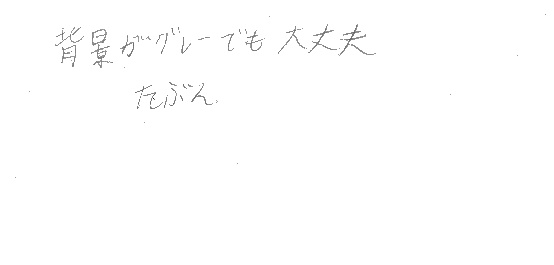

In [8]:
gray_img = dropout_background_color(img)
display_cv_image(gray_img)

### 文字の濃淡調整
今度は濃淡の調整です。以下のセルを実行して、初めの閾値設定のセルでDROPOUT_LEVELを調整してください。

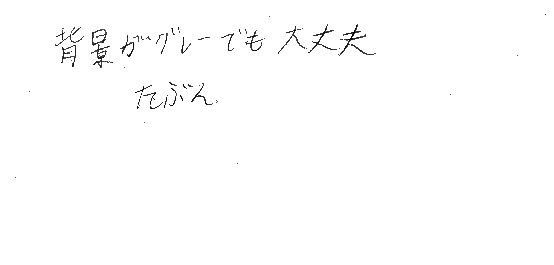

In [9]:
adjusted_img = adjust_thickness(gray_img)
display_cv_image(adjusted_img)

### ファイルの保存
以下のセルを実行するとファイルが保存できます。OUTPUT_DIRが存在しないとか、ファイルが作成できない場合は「False」が返ってきます

In [10]:
file_name, extension = IMAGE_NAME.split('.')
cv2.imwrite(OUTPUT_DIR + file_name + '_cleared' + '.' + extension, adjusted_img)

True

## Part2:ディレクトリ内の画像に鮮明化を実施
Part1で調整した設定値を用いてディレクトリ内の画像を鮮明化します。  
※test001とtest002は背景色が大きく異なるため、共通の設定値ではうまくいきません。実際に使用する際は
共通の背景のみ格納したディレクトリに対して実行してください。

In [11]:
files =  [f for f in os.listdir(IMAGE_DIR) if re.search('.*\.(jpg)', f, re.IGNORECASE)]
print('以下のファイルに処理します。')
print(files)

以下のファイルに処理します。
['test001.jpg', 'test002.jpg']


In [12]:
for file in files:
    img = cv2.imread(IMAGE_DIR + file)
    # 背景色削除
    gray_img = dropout_background_color(img)
    # 濃淡調整
    adjusted_img = adjust_thickness(gray_img)
    # 画像の保存
    file_name, extension = file.split('.')
    cv2.imwrite(OUTPUT_DIR + file_name + '_cleared' + '.' + extension, adjusted_img)
